Code to develop and test the function align_mean

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from janelia_core.stats.averages import aligned_mean

## Create some data to align

In [3]:
n_smps = 100
n_chs = 3
n_tm_pt_range = [30, 40]
nosie_std = 1

In [4]:
data = [None]*n_smps
align_inds = np.zeros(n_smps, dtype=int)
for s_i in range(n_smps):
    n_tm_pts = np.random.randint(low=n_tm_pt_range[0], high=n_tm_pt_range[-1] + 1)
    start_i = np.random.randint(low=0, high=n_tm_pts-n_chs+1)
    
    data_i = np.zeros([n_tm_pts, n_chs])
    for c_i in range(n_chs):
        data_i[start_i:start_i+c_i+1, c_i] = 1
    
    data_i = data_i + nosie_std*np.random.randn(*data_i.shape)
    
    data[s_i] = data_i
    align_inds[s_i] = int(start_i)

## Get averages

In [5]:
mns, std_ers, n_pts, align_ref_ind = aligned_mean(vls=data, align_inds=align_inds)

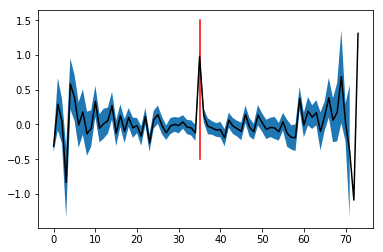

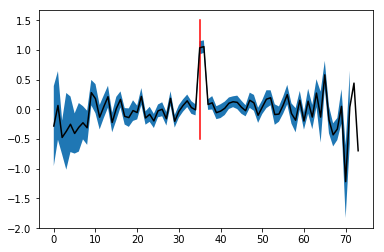

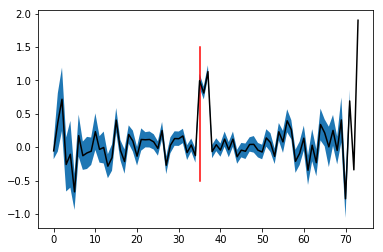

In [6]:
n_tm_pts = mns.shape[0]
for c_i in range(n_chs):
    plt.figure()
    plt.plot([align_ref_ind, align_ref_ind], [-.5, 1.5], 'r-')
    plt.plot(range(n_tm_pts), mns[:, c_i], 'k-')
    plt.fill_between(range(n_tm_pts), mns[:, c_i]-std_ers[:, c_i], mns[:, c_i]+std_ers[:, c_i])
#plt.plot(mns)